<a href="https://colab.research.google.com/github/tusharmanna/ML/blob/main/ANN_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#I am developing ANN for obesity prediction#import all modules related tensor and keras and scikit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: Read excel file from MLDatasests folder using pandas

# Assuming the excel file is named 'your_excel_file.xlsx'
# Replace 'your_excel_file.xlsx' with the actual file name
file_path = '/content/drive/MyDrive/MLDatasets/Obesity_Dataset.xlsx'

try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and name.")
except Exception as e:
    print(f"An error occurred: {e}")


In [5]:
df.head()


,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [7]:
#check for missing values
df.isnull().sum()


,0
Sex,0
Age,0
Height,0
Overweight_Obese_Family,0
Consumption_of_Fast_Food,0
Frequency_of_Consuming_Vegetables,0
Number_of_Main_Meals_Daily,0
Food_Intake_Between_Meals,0
Smoking,0
Liquid_Intake_Daily,0


In [8]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

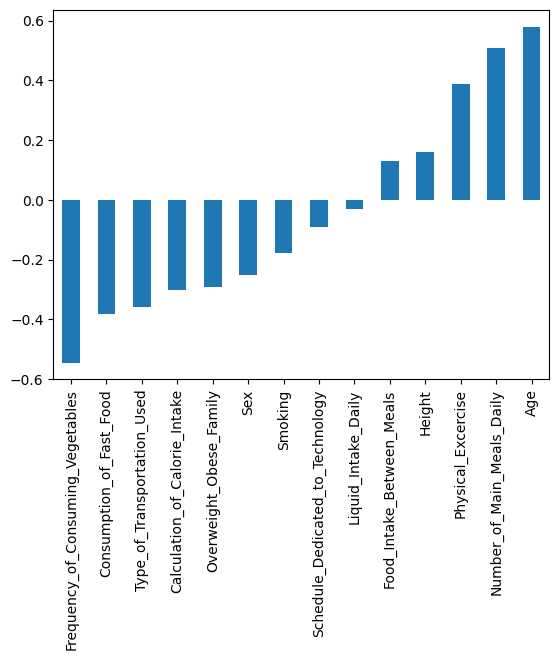

In [16]:
#check for correlation
df.corr()['Class'][:-1].sort_values(ascending=True).plot(kind='bar')

<Axes: xlabel='Sex', ylabel='Class'>

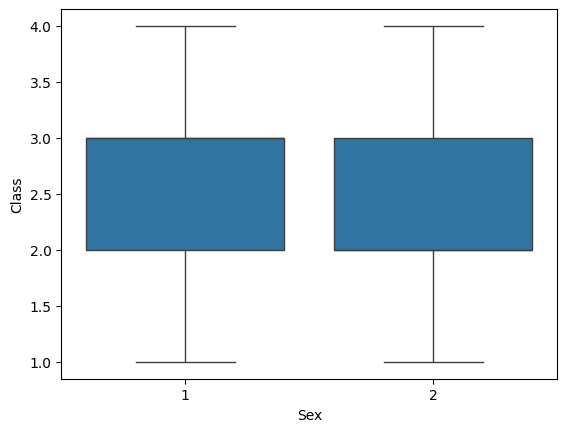

In [17]:
sns.boxplot(x='Sex',y = 'Class',data= df)

<Axes: xlabel='Schedule_Dedicated_to_Technology', ylabel='Class'>

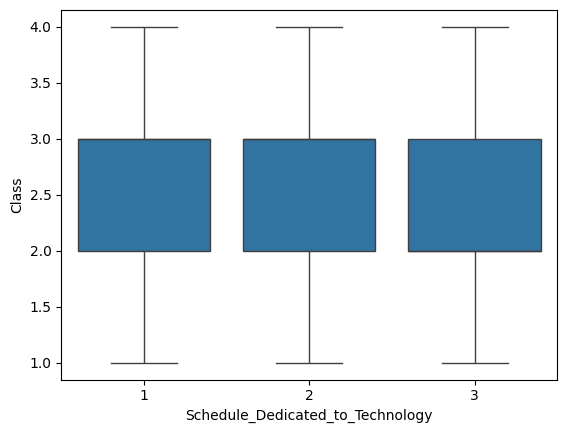

In [18]:
sns.boxplot(x='Schedule_Dedicated_to_Technology',y = 'Class',data= df)

<Axes: xlabel='Liquid_Intake_Daily', ylabel='Class'>

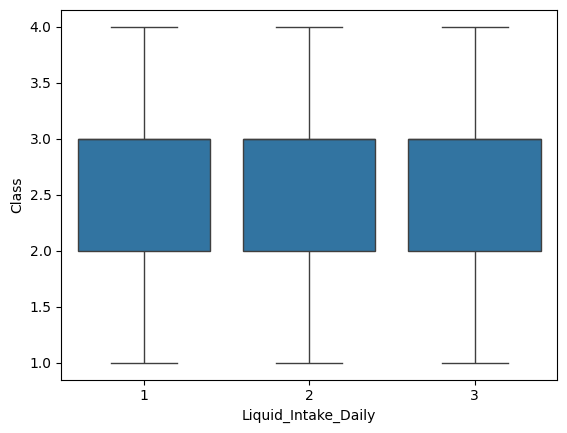

In [19]:
sns.boxplot(x='Liquid_Intake_Daily',y = 'Class',data= df)

<Axes: xlabel='Food_Intake_Between_Meals', ylabel='Class'>

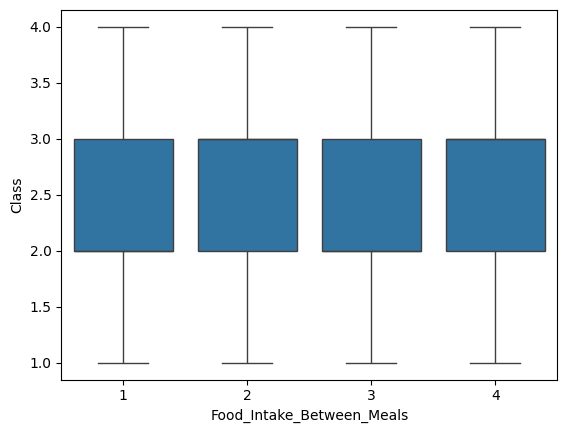

In [20]:
sns.boxplot(x='Food_Intake_Between_Meals',y = 'Class',data= df)

In [22]:
df.drop(['Sex','Schedule_Dedicated_to_Technology','Liquid_Intake_Daily','Food_Intake_Between_Meals'], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Class'>

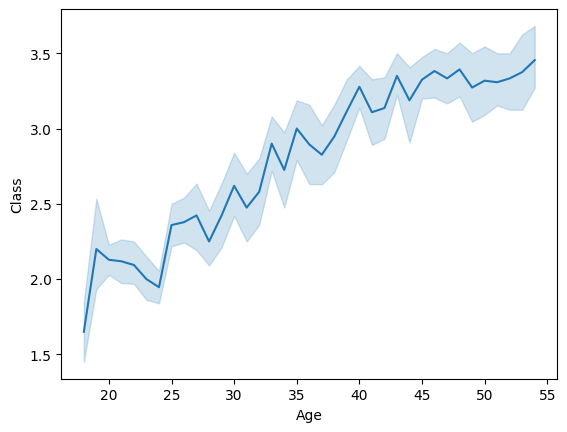

In [23]:
sns.lineplot(x= 'Age', y='Class', data=df)

In [23]:
df

,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Smoking,Calculation_of_Calorie_Intake,Physical_Excercise,Type_of_Transportation_Used,Class
0,18,155,2,2,3,1,2,2,3,4,2
1,18,158,2,2,3,1,2,2,1,3,2
2,18,159,2,2,2,1,2,2,2,4,2
3,18,162,2,2,2,2,2,2,1,4,2
4,18,165,2,1,2,1,2,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1605,51,165,2,1,1,3,1,1,3,1,4
1606,51,163,2,1,2,2,2,2,5,1,4
1607,52,162,1,2,1,3,1,1,4,1,4
1608,53,168,2,1,1,3,1,2,2,1,4


<Axes: xlabel='Age', ylabel='Class'>

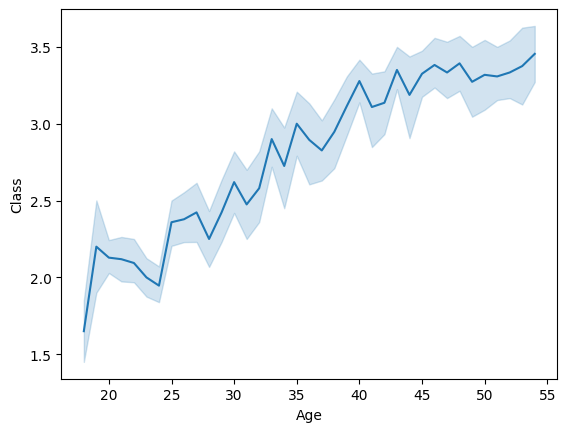

In [24]:
sns.lineplot(x= 'Age', y='Class', data=df)

In [26]:
def Age_divide(x):
    if x<=20:return 0
    elif x>20 and x <= 25: return 1
    elif x>25 and x <= 30: return 2
    elif x>30 and x <= 35: return 3
    elif x>35 and x <= 40: return 4
    elif x>40 and x <= 45: return 5
    elif x>45 and x <= 50: return 6
    elif x>50: return 7

df['Age_quantile'] = df['Age'].apply(Age_divide)
df['Age_quantile'] =df['Age_quantile'].astype(int)

<Axes: xlabel='Age_quantile', ylabel='Class'>

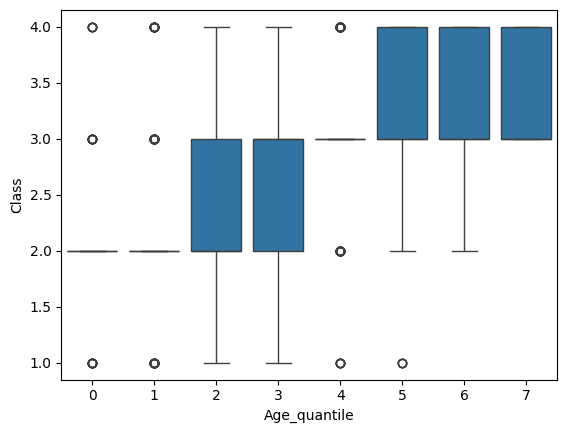

In [27]:
sns.boxplot(x='Age_quantile', y='Class', data=df )

In [29]:
df.drop(['Age'],axis=1,inplace=True)

<Axes: >

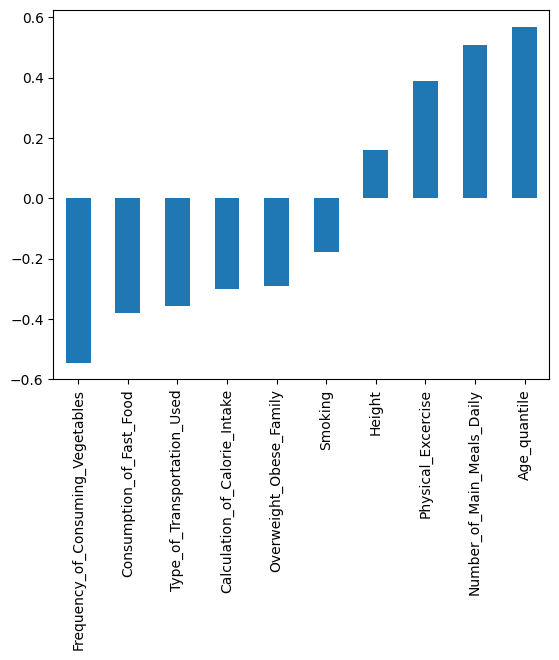

In [35]:
df_cor = df.corr()['Class'].sort_values(ascending=True)
df_cor[:-1].plot(kind='bar')

In [38]:
df['Class'].unique()

array([1, 2, 3, 0])

In [37]:
df['Class'] = df['Class'] -1

In [39]:
df['Class'].unique()

array([1, 2, 3, 0])

In [40]:
df

,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Smoking,Calculation_of_Calorie_Intake,Physical_Excercise,Type_of_Transportation_Used,Class,Age_quantile
0,155,2,2,3,1,2,2,3,4,1,0
1,158,2,2,3,1,2,2,1,3,1,0
2,159,2,2,2,1,2,2,2,4,1,0
3,162,2,2,2,2,2,2,1,4,1,0
4,165,2,1,2,1,2,2,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1605,165,2,1,1,3,1,1,3,1,3,7
1606,163,2,1,2,2,2,2,5,1,3,7
1607,162,1,2,1,3,1,1,4,1,3,7
1608,168,2,1,1,3,1,2,2,1,3,7


In [41]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [43]:
X_train.shape[1]

10

In [46]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [59]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,340 (48.20 KB)

 Trainable params: 12,340 (48.20 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [61]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', mode='max',patience=120,restore_best_weights=True)


In [62]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=1000, batch_size=8,  callbacks=[callback])


Epoch 1/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9497 - loss: 0.1180 - val_accuracy: 0.8447 - val_loss: 0.5864
Epoch 2/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9441 - loss: 0.1286 - val_accuracy: 0.8571 - val_loss: 0.6544
Epoch 3/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9506 - loss: 0.1143 - val_accuracy: 0.8385 - val_loss: 0.6825
Epoch 4/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9534 - loss: 0.1039 - val_accuracy: 0.8447 - val_loss: 0.6362
Epoch 5/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.1127 - val_accuracy: 0.8571 - val_loss: 0.6914
Epoch 6/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9533 - loss: 0.1065 - val_accuracy: 0.8540 - val_loss: 0.6886
Epoch 7/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9450 - loss: 0.1214 - val_accuracy: 0.8571 - val_loss: 0.6354
Epoch 8/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9606 - loss: 0.0901 - 

In [80]:
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [81]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 1, 3,
       1, 2, 1, 2, 2, 2, 0, 1, 2, 3, 1, 1, 2, 2, 2, 3, 0, 2, 1, 2, 1, 1,
       2, 1, 3, 1, 2, 3, 2, 2, 1, 0, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 3,
       3, 2, 1, 1, 2, 2, 1, 0, 1, 3, 1, 3, 2, 2, 2, 3, 1, 2, 3, 2, 3, 2,
       2, 1, 3, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 0, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 2,
       1, 0, 1, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 1, 1,
       2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 2, 2, 2, 2, 1, 0, 3, 3, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 3, 2, 1, 2, 1, 2, 3, 1, 3, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2,

In [67]:
y_test

,Class
29,3
99,1
678,3
1399,2
185,2
...,...
617,2
629,2
1574,3
1323,1


In [82]:
from sklearn.metrics import classification_report,accuracy_score, f1_score

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.91      0.92      0.91       125
           2       0.88      0.85      0.86       131
           3       0.82      0.85      0.83        53

    accuracy                           0.88       322
   macro avg       0.88      0.90      0.89       322
weighted avg       0.88      0.88      0.88       322



In [72]:
print("Accuracy is: ", round(accuracy_score(y_test, y_pred_classes),2)*100,"%")
print("F1-Score is: ", round(f1_score(y_test, y_pred_classes,average='weighted'),2)*100,"%")

Accuracy is:  88.0 %
F1-Score is:  88.0 %


In [75]:
cm = confusion_matrix(y_test, y_pred_classes)

print( cm)


[[ 13   0   0   0]
 [  1 115   8   1]
 [  0  11 111   9]
 [  0   1   7  45]]


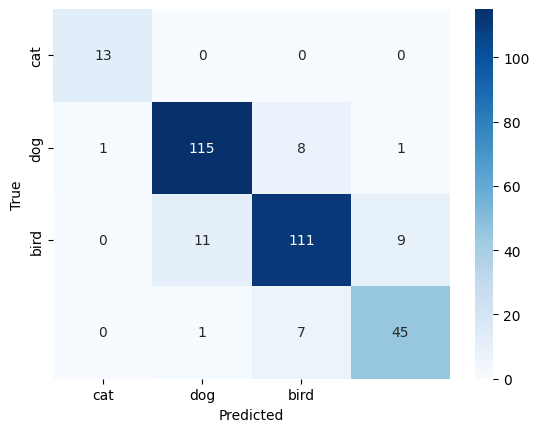

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cat', 'dog', 'bird'],
            yticklabels=['cat', 'dog', 'bird'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
model.save('obesity.h5')

In [84]:
#load the model
from keras.models import load_model # Import load_model
model = load_model('obesity.h5')

# Evaluate the model
model.evaluate(X_test, y_test)



11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8782 - loss: 0.7332  


[0.7035295963287354, 0.8819875717163086]